# MLI

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Resampling
from imblearn.over_sampling import SMOTE

# Feature selection
from sklearn.feature_selection import SelectFromModel

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

# Tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll import scope

# Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, auc,
                             roc_curve, roc_auc_score, classification_report, f1_score)
from sklearn.model_selection import GridSearchCV

import eli5
from eli5.sklearn import PermutationImportance
from pdpbox import pdp, get_dataset, info_plots


pd.options.display.max_columns = 999
%matplotlib inline
color = sns.color_palette()
sns.set_style('white')

## Read data

In [5]:
train = pd.read_csv('train_set.csv',index_col = 0)
test = pd.read_csv('test_set.csv',index_col = 0)

In [6]:
X_train = train.drop(columns = ['y'])
y_train = train['y']

X_test = test.drop(columns = ['y'])
y_test = test['y']

## Modelling

In [8]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [7]:
lgbm = LGBMClassifier(
    learning_rate = 0.1,
    reg_alpha = 0.7,
    reg_lambda = 0.7
)

In [10]:
lgbm.fit(X_train_smote,y_train_smote)

LGBMClassifier(reg_alpha=0.7, reg_lambda=0.7)

## MLI

### Permutation Importance

In [11]:
perm = PermutationImportance(lgbm).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0573 ± 0.0027,duration
0.0280 ± 0.0031,euribor3m
0.0169 ± 0.0009,marital_1.0
0.0155 ± 0.0016,marital_2.0
0.0146 ± 0.0009,day_of_week_thu
0.0131 ± 0.0016,day_of_week_mon
0.0128 ± 0.0007,day_of_week_fri
0.0124 ± 0.0026,job_1.0
0.0110 ± 0.0012,nr.employed
0.0103 ± 0.0012,job_0.0


### Partial Dependence Plot

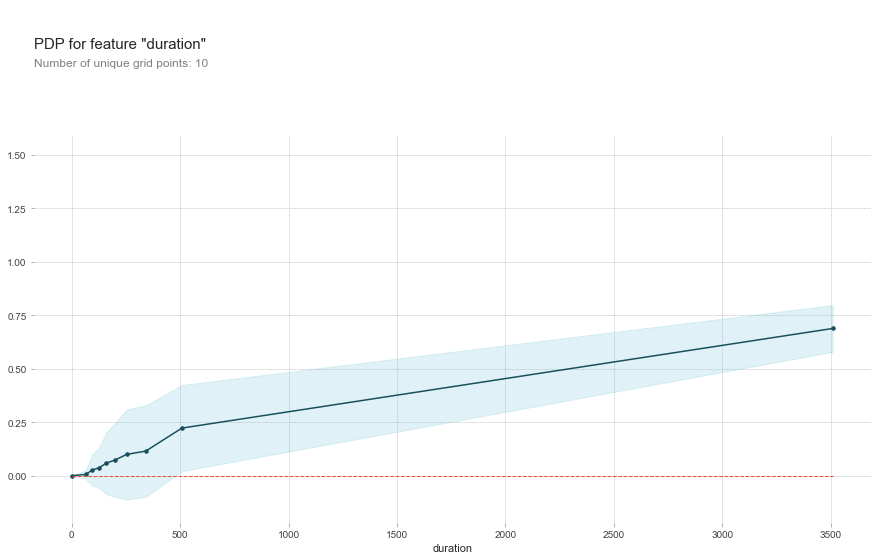

In [12]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgbm, dataset=X_test, model_features=X_test.columns.tolist(), feature='duration')

# plot it
pdp.pdp_plot(pdp_goals, 'duration')
plt.show()

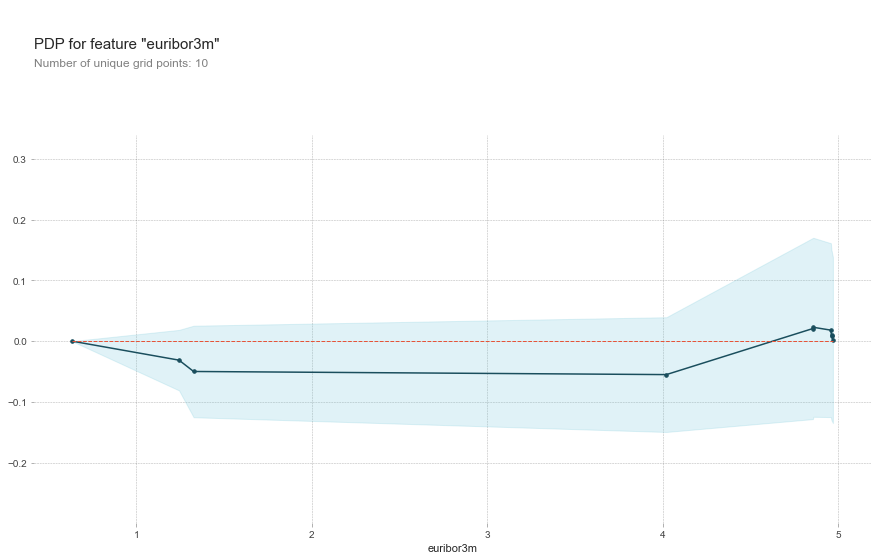

In [13]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgbm, dataset=X_test, model_features=X_test.columns.tolist(), feature='euribor3m')

# plot it
pdp.pdp_plot(pdp_goals, 'euribor3m')
plt.show()

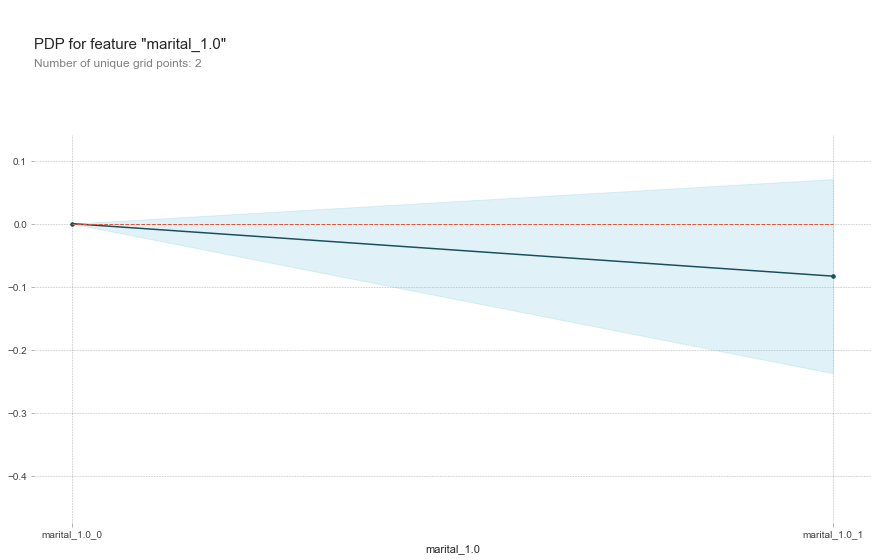

In [14]:

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=lgbm, dataset=X_test, model_features=X_test.columns.tolist(), feature='marital_1.0')

# plot it
pdp.pdp_plot(pdp_goals, 'marital_1.0')
plt.show()